In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [3]:
#Load Dataset
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
#Scale Dataset values to lie between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
#Add Noise to our MNNIST Dataset by sampling random values from Gaussian distribution
#by using np.random.normal() and adding it to our original images to change pixel values

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

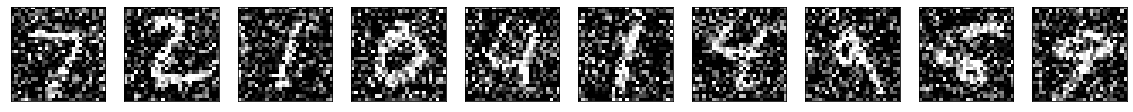

In [6]:
# Visualising the Noisy Digits using Matplotlib
n = 10 #change this number to visualise more digits.
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
# Specify the Input Layer size which is 28x28x1
input_img = Input(shape=(28, 28, 1))

In [8]:
# Model Construction
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# At this point the representation is (7, 7, 32)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
autoencoder.fit(x_train_noisy, x_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test),
)




Train on 60000 samples, validate on 10000 samples
Epoch 1/100





60000/60000 [==============================] - 36s 594us/step - loss: 0.1679 - val_loss: 0.1137
Epoch 2/100
60000/60000 [==============================] - 28s 458us/step - loss: 0.1110 - val_loss: 0.1066
Epoch 3/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.1063 - val_loss: 0.1034
Epoch 4/100
60000/60000 [==============================] - 27s 457us/step - loss: 0.1037 - val_loss: 0.1015
Epoch 5/100
60000/60000 [==============================] - 28s 458us/step - loss: 0.1020 - val_loss: 0.1004
Epoch 6/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.1007 - val_loss: 0.0994
Epoch 7/100
60000/60000 [==============================] - 28s 459us/step - loss: 0.0996 - val_loss: 0.0983
Epoch 8/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0989 - val_loss: 0.0977
Epoch 9/100
60000/60000 [==============================] - 27s 458us/step - lo

Epoch 60/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0934 - val_loss: 0.0936
Epoch 61/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0934 - val_loss: 0.0932
Epoch 62/100
60000/60000 [==============================] - 28s 458us/step - loss: 0.0934 - val_loss: 0.0931
Epoch 63/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0934 - val_loss: 0.0931
Epoch 64/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0934 - val_loss: 0.0932
Epoch 65/100
60000/60000 [==============================] - 28s 459us/step - loss: 0.0933 - val_loss: 0.0931
Epoch 66/100
60000/60000 [==============================] - 28s 459us/step - loss: 0.0933 - val_loss: 0.0932
Epoch 67/100
60000/60000 [==============================] - 27s 458us/step - loss: 0.0933 - val_loss: 0.0932
Epoch 68/100
60000/60000 [==============================] - 27s 457us/step - loss: 0.0933 - val_loss: 0.0932
Epoch 69/100
60000/

In [11]:
img_pred = autoencoder.predict(x_test_noisy[:1])

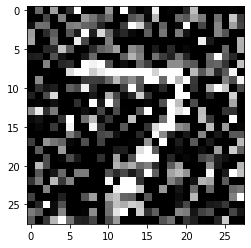

In [13]:
plt.imshow(x_test_noisy[0].reshape((28, 28)))

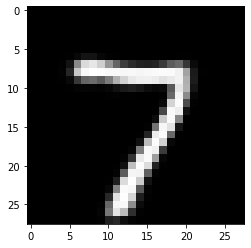

In [14]:
plt.imshow(img_pred.reshape((28, 28)))

In [15]:
img_pred = autoencoder.predict(x_test_noisy[1:2])

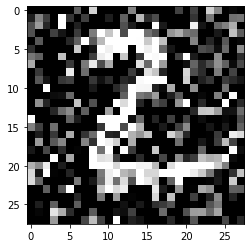

In [16]:
plt.imshow(x_test_noisy[1].reshape((28, 28)))

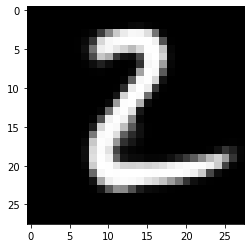

In [17]:
plt.imshow(img_pred.reshape((28, 28)))

### Работает!